<a href="https://www.kaggle.com/code/muhammadayyubramli/eda-jdc-2023-dabes-team?scriptVersionId=125279601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jdc-2023-dataset/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/jdc-2023-dataset/train.csv')
train.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (1,3,5,6,7,8,9,10,11,12,13,16,17,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,0,floor two,1.0,256 ft^2,22.0,Flat,Bamboo or Timber,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,1,Floor 3,3.0,985 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,2,Two Floor,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood-Mud or Bamboo Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,3,two,18.0,185 ft^2,15.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,4,just 2 floor,22.0,290 ft^2,17.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Timber Mud or Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722815 entries, 0 to 722814
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      722815 non-null  int64  
 1   floors_before_eq (total)        390009 non-null  object 
 2   old_building                    483611 non-null  float64
 3   plinth_area (ft^2)              301607 non-null  object 
 4   height_before_eq (ft)           390009 non-null  float64
 5   land_surface_condition          421209 non-null  object 
 6   type_of_foundation              483611 non-null  object 
 7   type_of_roof                    301607 non-null  object 
 8   type_of_ground_floor            390009 non-null  object 
 9   type_of_other_floor             421209 non-null  object 
 10  position                        410809 non-null  object 
 11  building_plan_configuration     421209 non-null  object 
 12  technical_soluti

In [4]:
train.dtypes

Unnamed: 0                          int64
floors_before_eq (total)           object
old_building                      float64
plinth_area (ft^2)                 object
height_before_eq (ft)             float64
land_surface_condition             object
type_of_foundation                 object
type_of_roof                       object
type_of_ground_floor               object
type_of_other_floor                object
position                           object
building_plan_configuration        object
technical_solution_proposed        object
legal_ownership_status             object
has_secondary_use                 float64
type_of_reinforcement_concrete    float64
residential_type                   object
no_family_residing                 object
public_place_type                  object
industrial_use_type                object
govermental_use_type               object
flexible_superstructure            object
wall_binding                      float64
wall_material                     

In [5]:
train.isna().sum()

Unnamed: 0                             0
floors_before_eq (total)          332806
old_building                      239204
plinth_area (ft^2)                421208
height_before_eq (ft)             332806
land_surface_condition            301606
type_of_foundation                239204
type_of_roof                      421208
type_of_ground_floor              332806
type_of_other_floor               301606
position                          312006
building_plan_configuration       301606
technical_solution_proposed       676014
legal_ownership_status            124802
has_secondary_use                 197604
type_of_reinforcement_concrete    291206
residential_type                  270404
no_family_residing                145602
public_place_type                      0
industrial_use_type               114402
govermental_use_type              249604
flexible_superstructure            62400
wall_binding                       62400
wall_material                     228804
damage_grade    

In [6]:
train.shape

(722815, 25)

In [7]:
train.describe(include=['int64', 'float64'])

,Unnamed: 0,old_building,height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,wall_binding,wall_material,damage_grade
count,722815.000000,483611.000000,390009.000000,525211.000000,431609.000000,660415.000000,494011.000000,722815.000000
mean,259955.144135,24.342800,16.047158,0.121279,0.072369,4.266729,1.738795,3.643872
std,150088.828380,64.963571,5.527362,0.326451,0.318483,1.667539,0.646120,1.342427
min,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,129983.500000,9.000000,12.000000,0.000000,0.000000,5.000000,2.000000,3.000000
50%,259983.000000,16.000000,16.000000,0.000000,0.000000,5.000000,2.000000,4.000000
75%,389922.000000,27.000000,18.000000,0.000000,0.000000,5.000000,2.000000,5.000000
max,520010.000000,999.000000,99.000000,1.000000,3.000000,7.000000,3.000000,5.000000


In [8]:
train.describe(include=['object'])

,floors_before_eq (total),plinth_area (ft^2),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure
count,390009,301607,421209,483611,301607,390009,421209,410809,421209,46801,598013,452411,577213,722815,608413,473211,660415
unique,47,930,3,12,12,15,11,4,10,4,13,6,11,13,9,3,2
top,Floor two,300 ft^2,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,Rectangular,Reconstruction,Private,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable
freq,22000,10937,349097,199916,79640,262305,223114,325721,404366,28847,315103,430854,487302,721495,564106,473073,607527


In [9]:
train.nunique(dropna=True)

Unnamed: 0                        520011
floors_before_eq (total)              47
old_building                         160
plinth_area (ft^2)                   930
height_before_eq (ft)                 77
land_surface_condition                 3
type_of_foundation                    12
type_of_roof                          12
type_of_ground_floor                  15
type_of_other_floor                   11
position                               4
building_plan_configuration           10
technical_solution_proposed            4
legal_ownership_status                13
has_secondary_use                      2
type_of_reinforcement_concrete         4
residential_type                       6
no_family_residing                    11
public_place_type                     13
industrial_use_type                    9
govermental_use_type                   3
flexible_superstructure                2
wall_binding                           6
wall_material                          4
damage_grade    

In [10]:
numerik = train.select_dtypes(include=['int64', 'float64'])
kategorik = train.select_dtypes(include=['object'])

In [11]:
numerik_columns = numerik.columns
numerik.columns

Index(['Unnamed: 0', 'old_building', 'height_before_eq (ft)',
       'has_secondary_use', 'type_of_reinforcement_concrete', 'wall_binding',
       'wall_material', 'damage_grade'],
      dtype='object')

In [12]:
kategorik_columns = kategorik.columns
kategorik.columns

Index(['floors_before_eq (total)', 'plinth_area (ft^2)',
       'land_surface_condition', 'type_of_foundation', 'type_of_roof',
       'type_of_ground_floor', 'type_of_other_floor', 'position',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'no_family_residing',
       'public_place_type', 'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure'],
      dtype='object')

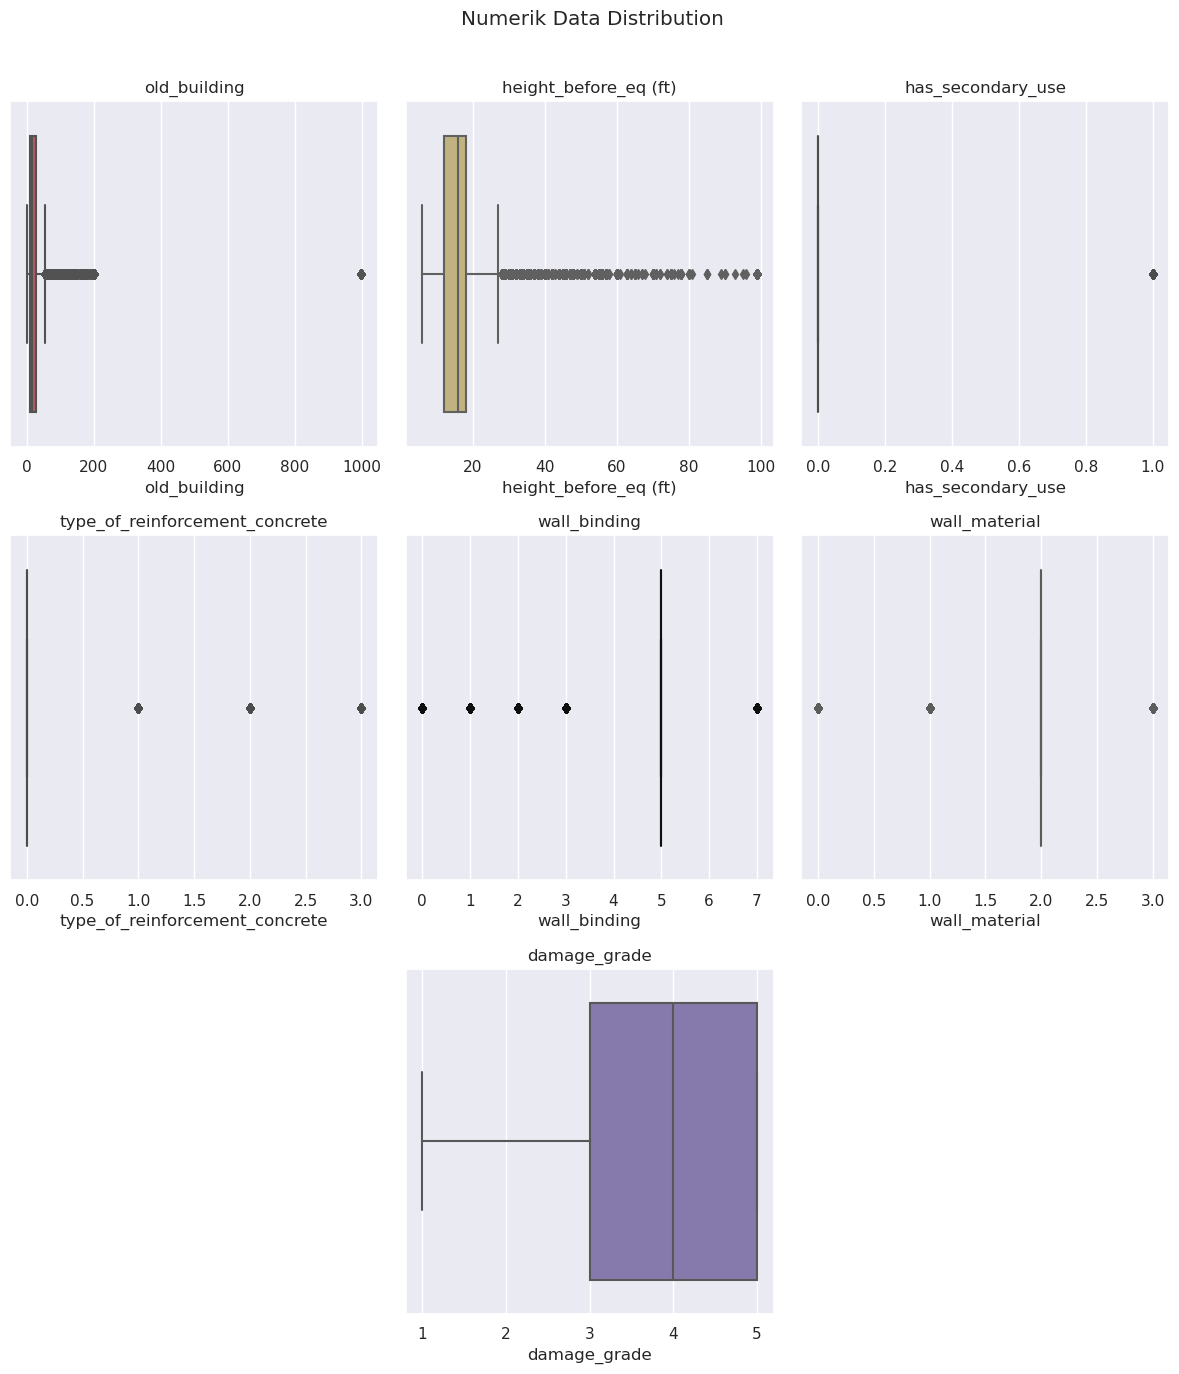

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12, 14))
fig.suptitle('Numerik Data Distribution\n\n')

sns.boxplot(train, x=numerik_columns[1], ax=axes[0,0], color='r')
axes[0,0].set_title(numerik_columns[1])

sns.boxplot(train, x=numerik_columns[2], ax=axes[0,1], color='y')
axes[0,1].set_title(numerik_columns[2])

sns.boxplot(train, x=numerik_columns[3], ax=axes[0,2], color='g')
axes[0,2].set_title(numerik_columns[3])

sns.boxplot(train, x=numerik_columns[4], ax=axes[1,0], color='b')
axes[1,0].set_title(numerik_columns[4])

sns.boxplot(train, x=numerik_columns[5], ax=axes[1,1], color='k')
axes[1,1].set_title(numerik_columns[5])

sns.boxplot(train, x=numerik_columns[6], ax=axes[1,2], color='c')
axes[1,2].set_title(numerik_columns[6])

sns.boxplot(train, x=numerik_columns[7], ax=axes[2,1], color='m')
axes[2,1].set_title(numerik_columns[7])

fig.delaxes(axes[2,0])
fig.delaxes(axes[2,2])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, '\nKorelasi Data Numerik\n')

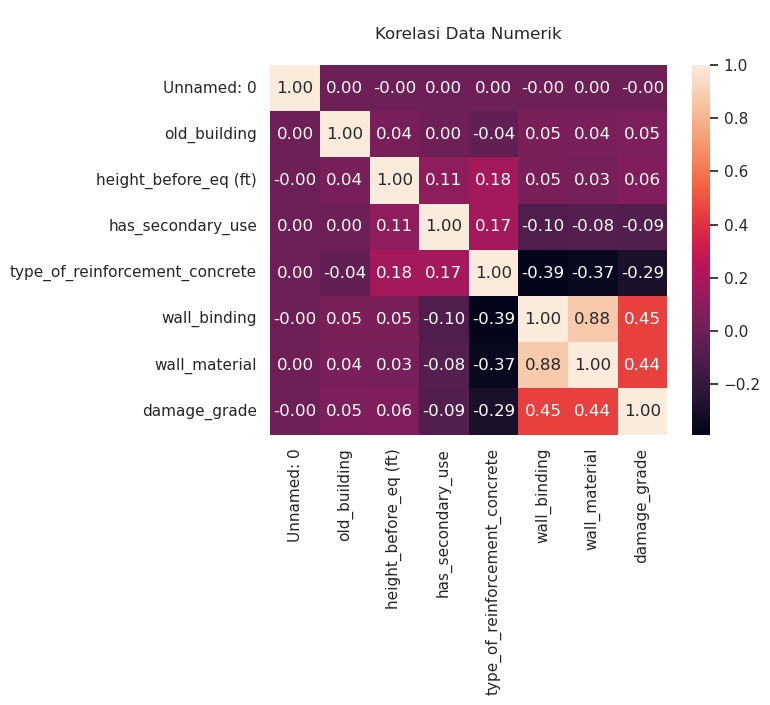

In [14]:
sns.heatmap(
    numerik.corr(),
    annot=True,
    fmt='.2f',
)

plt.title('\nKorelasi Data Numerik\n')

# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.12, right=0.95)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

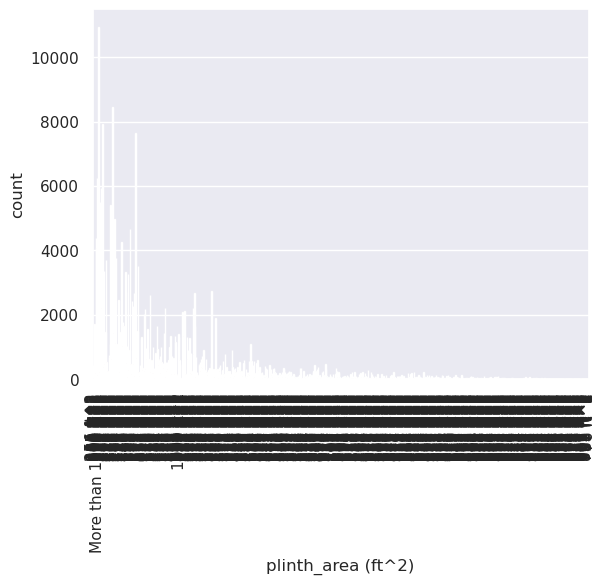

In [15]:
sns.countplot(train, x=kategorik_columns[1])
plt.xticks(rotation=90)